- ### Planteamiento del problema:

¿Cuál será la prima (coste) de la póliza de los clientes en función de sus datos fisiológicos?

In [1]:
# Se importa el dataset
import pandas as pd

url = 'https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv'
dataframe = pd.read_csv(url)

- ### Exploración y limpieza de datos:

In [2]:
# Primera apreciacion del dataset
filas = dataframe.shape[0]
columnas = dataframe.shape[1]
print(f'Filas: {filas} | Columnas: {columnas}')
print()
print(dataframe.info())

Filas: 1338 | Columnas: 7

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [3]:
dataframe.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
print(dataframe.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [5]:
print(dataframe.sex.unique())
print(dataframe.smoker.unique())
print(dataframe.region.unique())

['female' 'male']
['yes' 'no']
['southwest' 'southeast' 'northwest' 'northeast']


In [6]:
dataframe.dtypes.value_counts()

object     3
int64      2
float64    2
Name: count, dtype: int64

- Inicialmente se puede observar que no existen valores nulos en ninguna de las variables.
- Hay 1.338 registros y 7 clases incluyendo la clase a predecir.
- Hay 3 variables categóricas y 4 numéricas.

In [7]:
# Se verifica la existencia de duplicados
duplicados = dataframe.duplicated().sum()
print(f'Existen {duplicados} registros duplicados.')
print(f'El % de registros "duplicados" es {duplicados/filas}.')

Existen 1 registros duplicados.
El % de registros "duplicados" es 0.0007473841554559044.


In [8]:
# Se eliminan los registros duplicados

dataframe.drop_duplicates(inplace = True)

print(f'Se eliminaron {filas-(dataframe.shape[0])} duplicados')

Se eliminaron 1 duplicados


Inicialmente todas las clases parecen ser relevantes respecto a la variable a predecir. Es por ello que no se eliminará ninguna.

- ### Análisis univariante:

##### Para variables categóricas

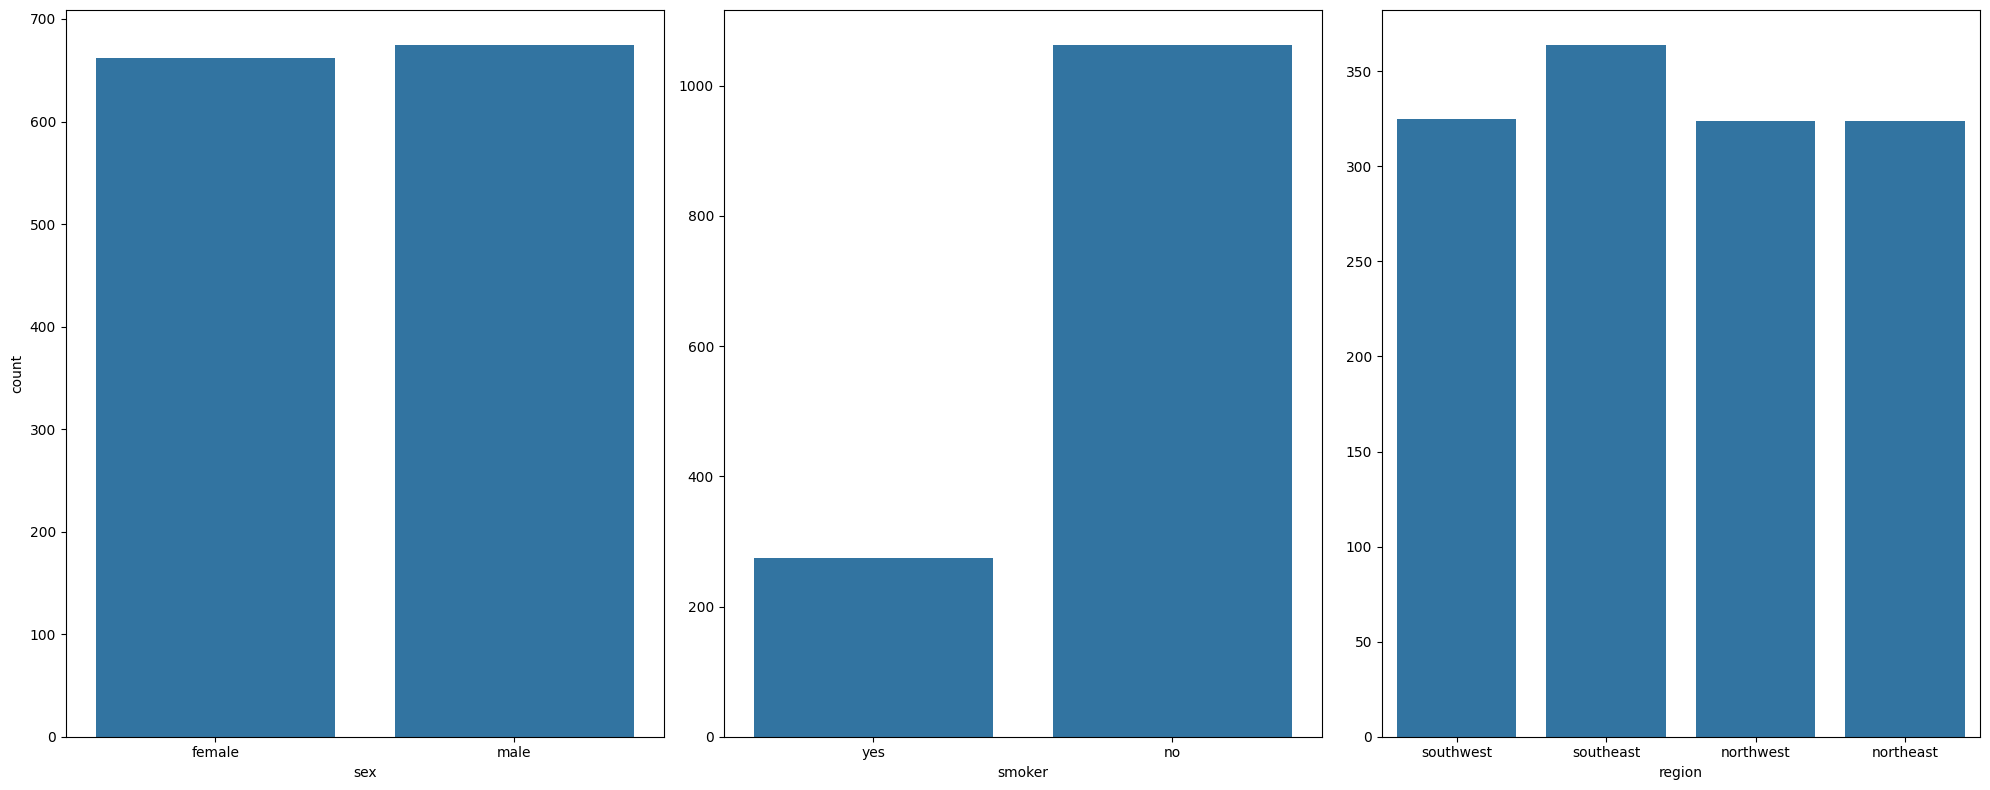

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(1,3, figsize = (20, 8))

sns.countplot(ax = axis[0], data = dataframe, x = 'sex')
sns.countplot(ax = axis[1], data = dataframe, x = 'smoker').set(ylabel = None)
sns.countplot(ax = axis[2], data = dataframe, x = 'region').set(ylabel = None)

plt.tight_layout()

plt.show()

In [10]:
smoker_yes = len(dataframe.query("smoker == 'yes'"))
smoker_no = len(dataframe.query("smoker == 'no'"))

print(f'La relación entre la población no fumadora y fumadora es de: {round(smoker_no/smoker_yes,2)}')

La relación entre la población no fumadora y fumadora es de: 3.88


- Existe una proporción similar de hombres y mujeres en la población estudiada.
- La relación entre la población no fumadora y fumadora es aprox. 4:1
- La población está prácticamente distribuida uniformemente entre las 4 regiones, aunque un Southeast posee un poco más de clientes.

##### Para variables numéricas

/workspaces/EDA/EDA-env/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/workspaces/EDA/EDA-env/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/workspaces/EDA/EDA-env/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


/workspaces/EDA/EDA-env/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


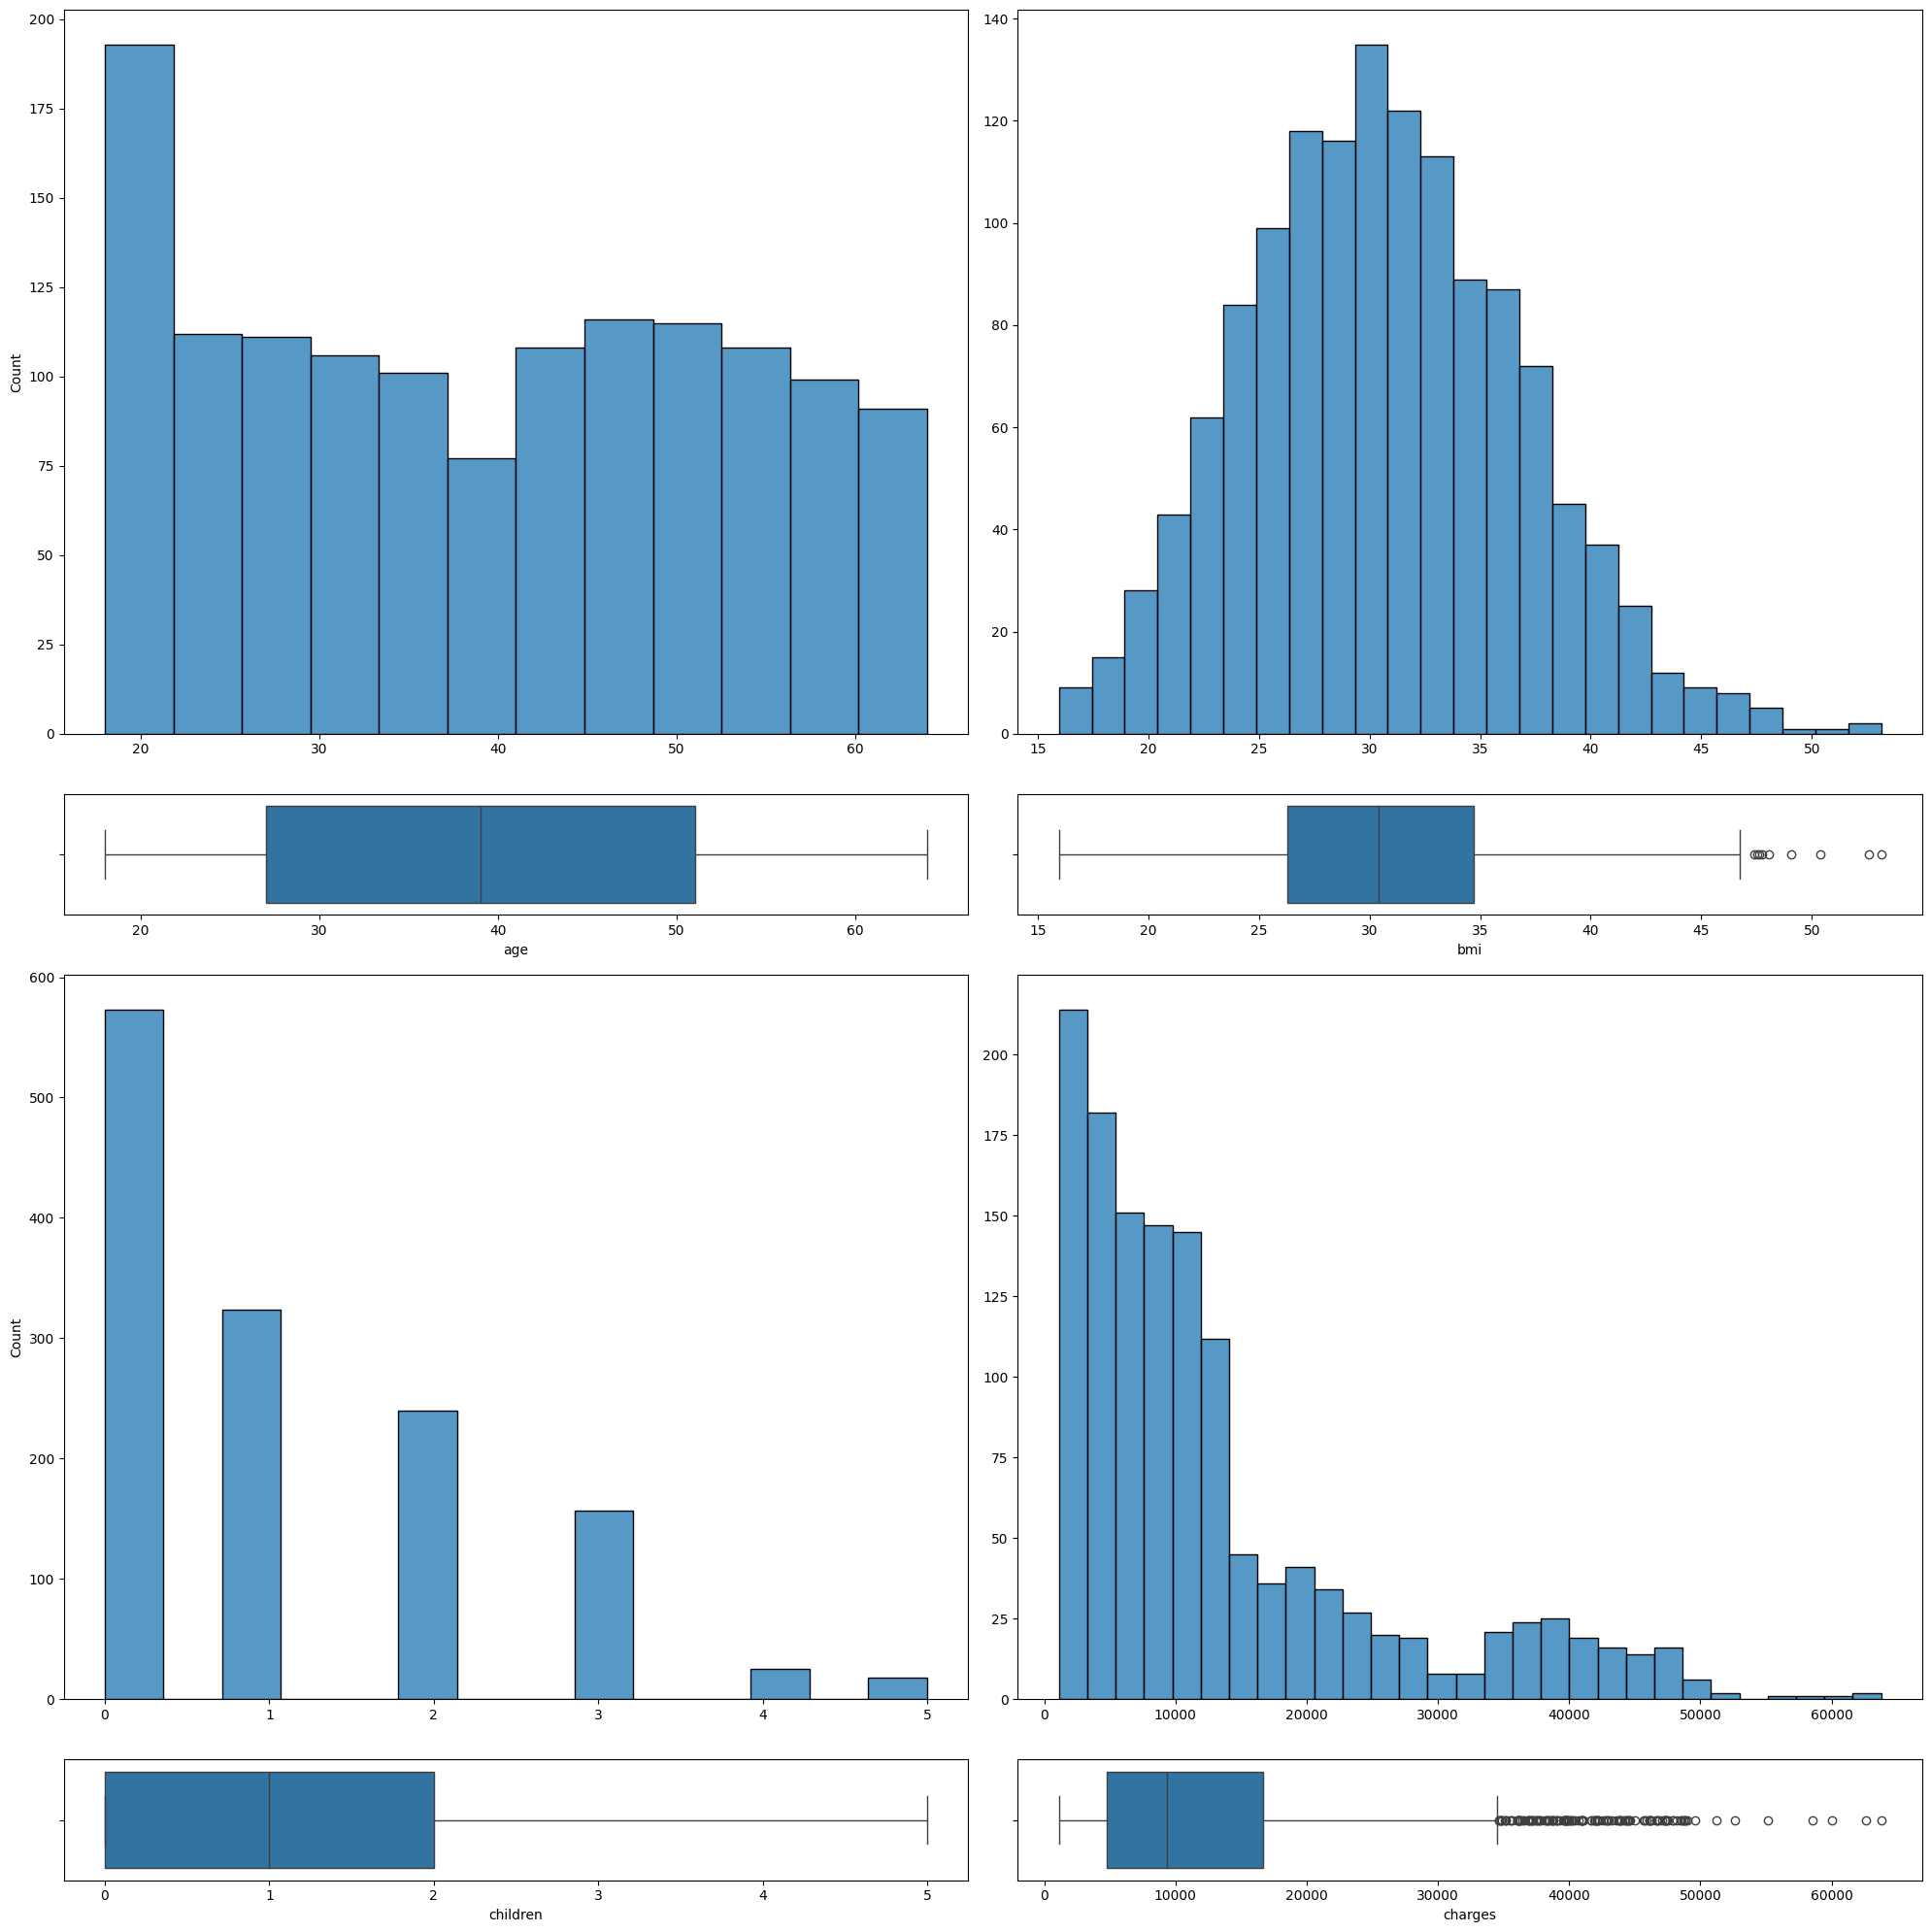

In [11]:
fig, axis = plt.subplots(4, 2, figsize = (20,20), gridspec_kw={'height_ratios': [6, 1, 6, 1]})

sns.histplot(ax = axis[0,0], data = dataframe, x = 'age').set(xlabel = None)
sns.boxplot(ax = axis[1,0], data = dataframe, x = 'age')

sns.histplot(ax = axis[0,1], data = dataframe, x = 'bmi').set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1,1], data = dataframe, x = 'bmi')

sns.histplot(ax = axis[2,0], data = dataframe, x = 'children').set(xlabel = None)
sns.boxplot(ax = axis[3,0], data = dataframe, x = 'children')

sns.histplot(ax = axis[2,1], data = dataframe, x = 'charges').set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3,1], data = dataframe, x = 'charges')

plt.tight_layout()

plt.show()

- La edades están bastante uniformemente distribuidas, sin valores a típicos.
- El índice de masa corporal presenta una distribución muy cercana a la normalcon muy pocos valores atípicos.
- La mayoría de los clientes tienen entre 0 y 3 hijos, aunque viendo cada grupo individual, la gran mayoría no tiene hijos.
- Para el costo de la póliza, existe una importante importante cantidad de avlores atípicos, además los datos están sesgados hacia la izquierda.

- ### Análisis multivariante:

##### Para categóricas

/workspaces/EDA/EDA-env/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/workspaces/EDA/EDA-env/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


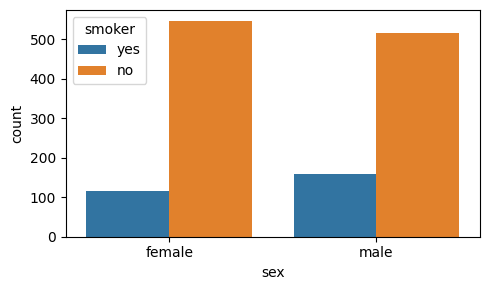

In [14]:
plt.figure(figsize = (5,3))

sns.countplot(data = dataframe, x = 'sex', hue = 'smoker')

plt.tight_layout()

plt.show()


In [15]:
smoker_yes_men = len(dataframe.query("smoker == 'yes' & sex == 'male'"))
smoker_no_men = len(dataframe.query("smoker == 'no' & sex == 'male'"))

smoker_yes_women = len(dataframe.query("smoker == 'yes' & sex == 'female'"))
smoker_no_women = len(dataframe.query("smoker == 'no' & sex == 'female'"))

print(f'La relación entre la población no fumadora y fumadora entre mujeres es de: {round(smoker_no_women/smoker_yes_women,2)}')
print(f'La relación entre la población no fumadora y fumadora entre hombres es de: {round(smoker_no_men/smoker_yes_men,2)}')

La relación entre la población no fumadora y fumadora entre mujeres es de: 4.76
La relación entre la población no fumadora y fumadora entre hombres es de: 3.25


Proporcionalmente hablando, la población femenina es menos fumadora que la masculina

##### Combinación de clases

/workspaces/EDA/EDA-env/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/workspaces/EDA/EDA-env/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


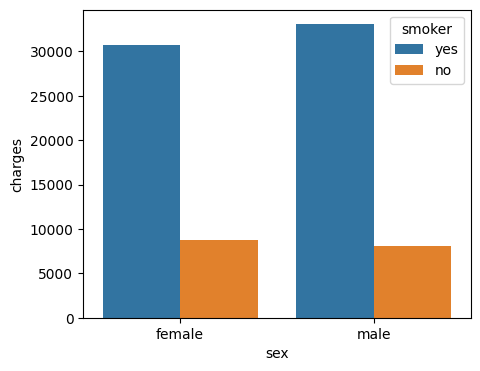

In [19]:
plt.figure(figsize = (5,4))

sns.barplot(data = dataframe, x = 'sex', y = 'charges', hue = 'smoker', errorbar=None)

plt.show()

- El costo promedio de la póliza en la población fumadora es mayor que en la población no fumadora, tanto para hombres como para mujeres.
- El costo promedio de la póliza en mujeres no fumadoras es mayor que en hombres no fumadores.
- El costo promedio de la póliza en mujeres fumadoras es menor que en hombres fumadores.

##### Para numéricas

In [21]:
dataframe.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
fig, axis = plt.subplots(4, 2, figsize = (20, 40))

sns.regplot(ax = axis[0,0], data = dataframe, x = 'age', y = 'charges')
sns.heatmap(ax = axis[1,0], )

- ### Análisis Numérico-Numérico completo:

In [20]:
dataframe.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [24]:
#Normalizacion de las variables categóricas
dataframe["job_n"] = pd.factorize(dataframe["job"])[0]
dataframe["marital_n"] = pd.factorize(dataframe["marital"])[0]
dataframe["education_n"] = pd.factorize(dataframe["education"])[0]
dataframe["default_n"] = pd.factorize(dataframe["default"])[0]
dataframe["housing_n"] = pd.factorize(dataframe["housing"])[0]
dataframe["loan_n"] = pd.factorize(dataframe["loan"])[0]
dataframe["contact_n"] = pd.factorize(dataframe["contact"])[0]
dataframe["month_n"] = pd.factorize(dataframe["month"])[0]
dataframe["day_of_week_n"] = pd.factorize(dataframe["day_of_week"])[0]
dataframe["poutcome_n"] = pd.factorize(dataframe["poutcome"])[0]
dataframe["y_n"] = pd.factorize(dataframe["y"])[0]

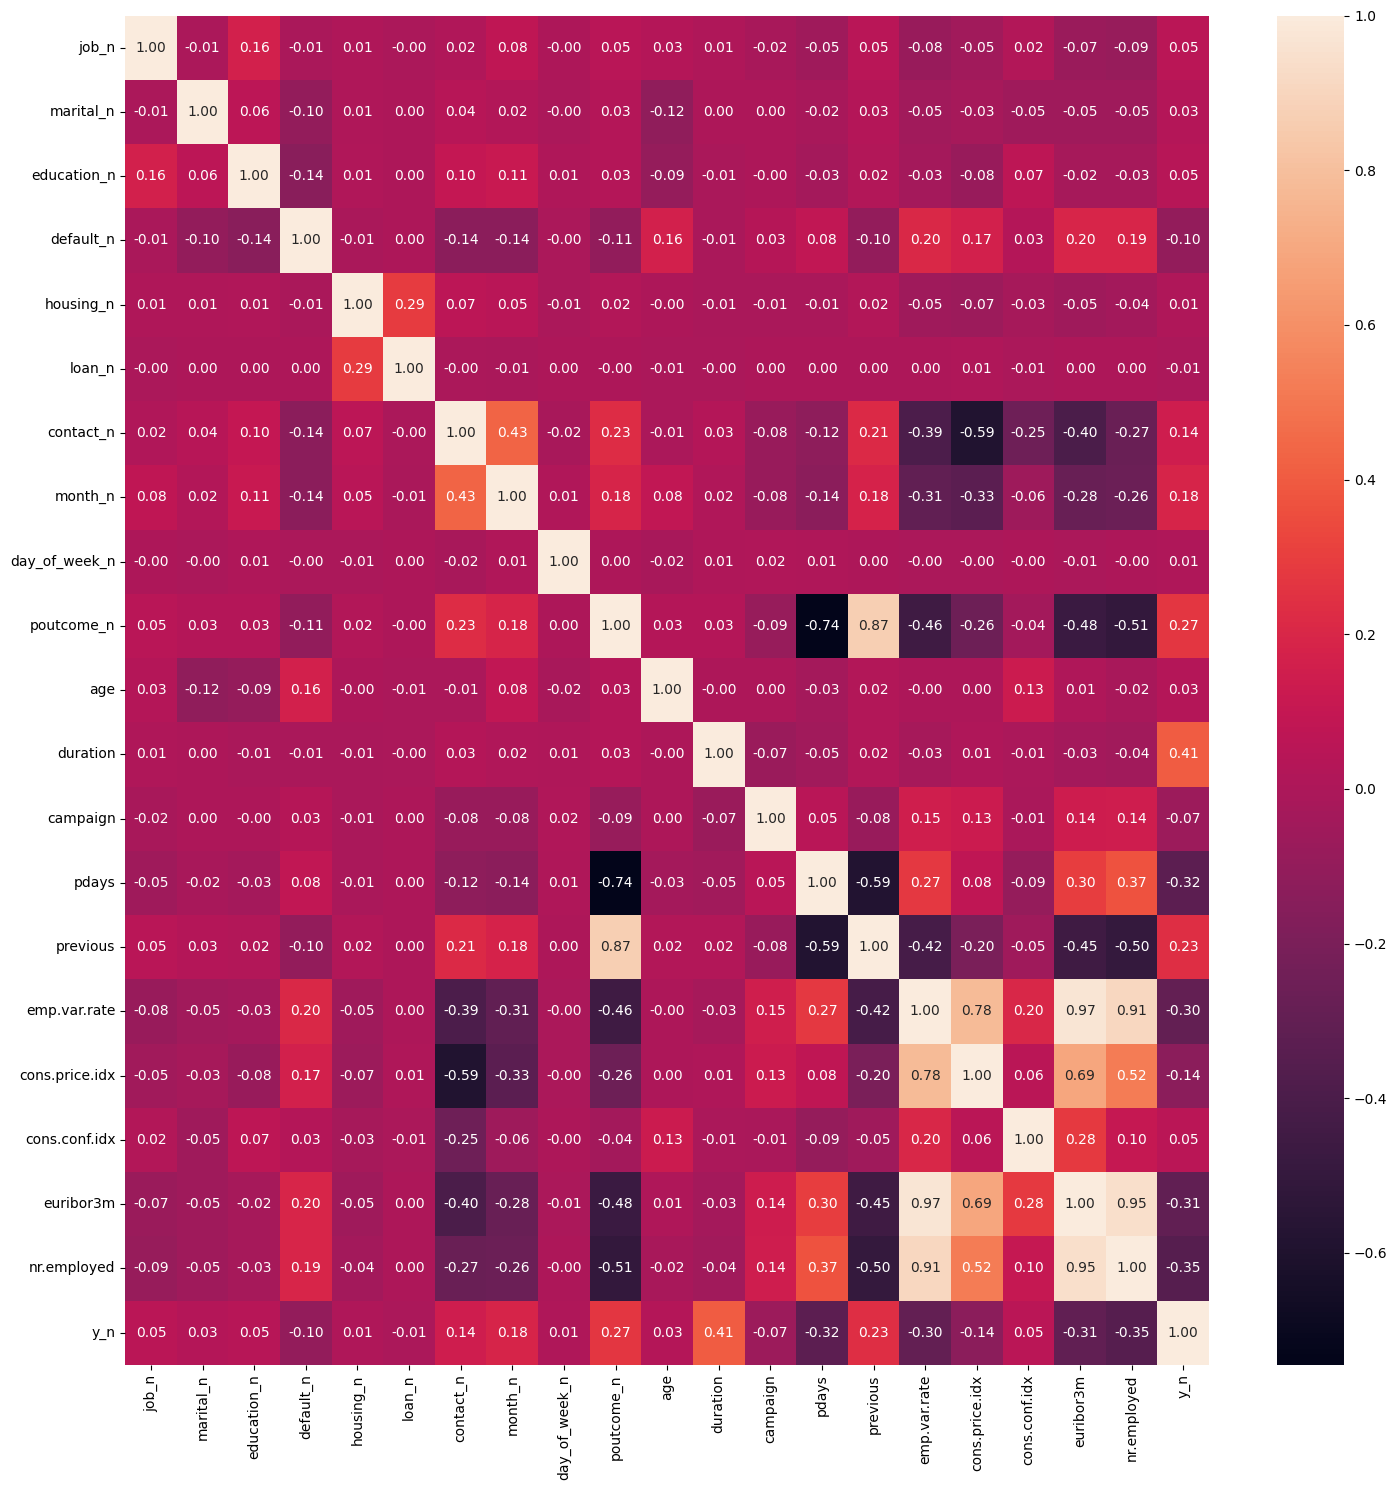

In [25]:
plt.figure(figsize = (15,15))

sns.heatmap(dataframe[['job_n', 'marital_n', 'education_n', 'default_n', 'housing_n', 'loan_n',
                       'contact_n', 'month_n', 'day_of_week_n', 'poutcome_n', 'age', 'duration', 'campaign',
                       'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
                       'nr.employed', 'y_n']].corr(), annot = True, fmt = ".2f")

plt.tight_layout()
plt.show()

- Ya que se va a utilizar un modelo de regresión logística, se eliminan variables que tienen alta correlación entre sí para evitar problemas de multicolinealidad. Esto ocurre entre "emp.var.rate", "nr.employed" y "euribor3m". Se decide eliminar las columnas de "emp.var.rate" y "nr.employed", ya que "euribor3m" tiene la más alta correlación con ambas, además es un indicador relacionado con los tipos de interés, lo cual obviamente afecta la contratación de un depósito a largo plazo.
- Entre las relaciones más destacables están:
    - A mayor duración del contacto, mayor probabilidad de contratación de depósito.
    - A mayor cantidad de contactos en la campaña previa, mayor probabilidad de contración del depósito.
    - A mayor éxito en la campaña previa, mayor éxito en la actual contratación.
    - A mayor número de contactos en la canmpaña anterior, mejor resultado en dicha campaña.

In [26]:
dataframe.drop(["nr.employed","emp.var.rate"], axis = 1, inplace = True)

Se escalan los datos con StandardScaler este método es menos sensible a los outliers, no se eliminan outliers, se desea esperar el rendimiento del modelo y en dado caso se podrian usar métodos de regularización antes de eliminar datos.

In [27]:
dataframe.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'y', 'job_n', 'marital_n', 'education_n', 'default_n', 'housing_n',
       'loan_n', 'contact_n', 'month_n', 'day_of_week_n', 'poutcome_n', 'y_n'],
      dtype='object')

In [28]:
dataframe.drop(['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome','y'], axis = 1, inplace = True)

In [29]:
#Primero se separan los conjuntos de train y test
from sklearn.model_selection import train_test_split

X = dataframe.drop(['y_n'], axis = 1)
y = dataframe['y_n']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [30]:
n_columns = X.columns.tolist()

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, index = X_train.index, columns = n_columns)

X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, index = X_test.index, columns = n_columns)

#### - Logistic regression

In [32]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [33]:
y_predict = model.predict(X_test_scaled)
y_predict

array([1, 0, 0, ..., 0, 0, 0])

In [34]:
from sklearn.metrics import accuracy_score

precision_base = accuracy_score(y_test, y_predict)
print(f'La precisión del modelo base fue de: {precision_base}')

La precisión del modelo base fue de: 0.9042010684798446


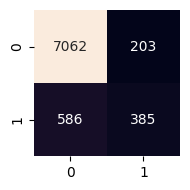

In [35]:
from sklearn.metrics import confusion_matrix

deposit = confusion_matrix(y_test, y_predict)

# Dibujaremos esta matriz para hacerla más visual
deposit_df = pd.DataFrame(deposit)
plt.figure(figsize = (2, 2))
sns.heatmap(deposit_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.show()

- 7062 verdaderos positivos, es decir, se predijo ese número de no contratos, y efectivamente coincidían con la clase real.
- 385 verdaderos negativos, es decir, se predijo ese número de contratos, y efectivamente coincidían con la clase real.
- 203 falsos positivos, es decir, se predijo ese número de no contratos, y no coincidían con la clase real.
- 586 falsos negativos, es decir, se predijo ese número de contratos, y no coincidían con la clase real.

Se intentará mejorar la precisión del modelo a partir de la aplicación de hiperparámetros.
Ya que no se tiene una idea inicial del rango correcto para cada uno, se usa RandomizedSearchCV.
Además, se trata de un conjunto de datos grande.

In [36]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

param_dist = {
    'penalty':['l1','l2','elasticnet',None],
    'C':np.logspace(-4, 4, 20),    
    'solver':["newton-cg", "lbfgs", "liblinear", "sag", "saga", "newton-cholesky"]
}

random_searc = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_jobs=-1, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_searc

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    None],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag', 'saga',
                                                   'newton-cholesky']},
                   random_state=42, scoring='accuracy')

In [37]:
random_searc.fit(X_train_scaled,y_train)

/workspaces/EDA/EDA-env/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:542: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/workspaces/EDA/EDA-env/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/workspaces/EDA/EDA-env/lib/python3.11/site-packages/sklearn/base.py", line 1351, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/workspaces/EDA/EDA-env/lib/python3.11/site-packages/sklearn/linear_model/_logisti

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    None],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag', 'saga',
                                                   'newton-cholesky']},
                   random_state=42, scoring='accuracy')

In [38]:
print(f"Mejores hiperparámetros: {random_searc.best_params_}")

Mejores hiperparámetros: {'solver': 'saga', 'penalty': 'l1', 'C': 4.281332398719396}


In [39]:
model_random_search = LogisticRegression(solver = "saga", penalty = "l1", C = 4.281332398719396)
model_random_search.fit(X_train_scaled, y_train)
y_predict_random = model_random_search.predict(X_test_scaled)

precision_random = accuracy_score(y_test, y_predict_random)
print(f'La precisión del modelo base fue de: {precision_random}')

La precisión del modelo base fue de: 0.9043224866440019


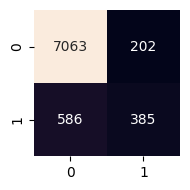

In [40]:
deposit_rand = confusion_matrix(y_test, y_predict_random)

# Dibujaremos esta matriz para hacerla más visual
deposit_df_rand = pd.DataFrame(deposit_rand)
plt.figure(figsize = (2, 2))
sns.heatmap(deposit_df_rand, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.show()

Apenas se logró una mejoría de una centésima en la precisión, de igual forma el rendimiento del modelo es alto.